In [162]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [114]:
# Importing the data set
rfmdf=pd.read_csv(r"C:\Users\srava\Advance ML Exam\Dataset\RFM Dataset\RFM data.csv")

In [115]:
rfmdf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [116]:
rfmdf.info() # Infomation about data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392735 entries, 0 to 392734
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392735 non-null  int64  
 1   StockCode    392735 non-null  object 
 2   Description  392735 non-null  object 
 3   Quantity     392735 non-null  int64  
 4   InvoiceDate  392735 non-null  object 
 5   UnitPrice    392735 non-null  float64
 6   CustomerID   392735 non-null  float64
 7   Country      392735 non-null  object 
 8   TotalPrice   392735 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.0+ MB


In [117]:
# From info we get to know that there are no null values present in the data,
# and the information about no of rows,columns,dtypes etc...

In [118]:
# converting invoice date to datatime format
rfmdf.InvoiceDate=pd.to_datetime(rfmdf.InvoiceDate)

In [119]:
rfmdf.info() # InvoiceDate column's data type is changed to datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392735 entries, 0 to 392734
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392735 non-null  int64         
 1   StockCode    392735 non-null  object        
 2   Description  392735 non-null  object        
 3   Quantity     392735 non-null  int64         
 4   InvoiceDate  392735 non-null  datetime64[ns]
 5   UnitPrice    392735 non-null  float64       
 6   CustomerID   392735 non-null  float64       
 7   Country      392735 non-null  object        
 8   TotalPrice   392735 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 27.0+ MB


In [120]:
rfmdf['InvoiceDate'].min() # starting date is 2010-12-01

Timestamp('2010-12-01 08:26:00')

In [121]:
last_date=pd.to_datetime(rfmdf['InvoiceDate'].max()) # end date is 2011-12-09

In [122]:
last_date

Timestamp('2011-12-09 12:50:00')

### Calculate the 
a) recency (R),
b) frequency (F)
c) monetary value (M)
for each customer based on the given dataset?

In [123]:
# Calculating Recency
from datetime import datetime

rfmdf['Recency']=(last_date-rfmdf['InvoiceDate']).dt.days

In [124]:
rfmdf.Recency.head() # in days

0    373
1    373
2    373
3    373
4    373
Name: Recency, dtype: int64

In [125]:
pd.set_option('display.max_rows', 3000)
rfmdf.head(3000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
5,536365,22752,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,373
6,536365,21730,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,373
7,536366,22633,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373
8,536366,22632,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373
9,536367,84879,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,373


In [126]:

rfmdf.Recency.value_counts().sort_index(ascending=False)

Recency
373    1058
372    1645
371    1674
370     605
369    1153
368    2403
367    1489
366    1635
365    1535
364    2025
363     488
362     855
361     956
360    1526
359    1522
358    1295
357    1332
356     418
355     112
354     629
353     693
352     347
351     211
350     235
339     245
338     989
337    1007
336    1259
335     569
334     531
333     969
332     905
331     630
330     998
329     693
328     342
327     151
326     903
325     704
324     835
323     803
322     633
321     375
320     304
319     920
318     930
317    1109
316    1090
315    1088
314     273
313     224
312     957
311    1163
310     923
309    1024
308     885
307     274
306      99
305     669
304     733
303     533
302     505
301     728
300     166
299     332
298     624
297     840
296    1141
295     910
294     918
293     171
292     274
291     979
290     835
289    1435
288     945
287     994
286     313
285     450
284     807
283    1191
282     861
281     

In [127]:
rfmdf.Recency.min() # minimum days

0

In [128]:
rfmdf.Recency.max() # maximum days

373

In [129]:
# Calculating Frequency (how frequent customer making purchase )
freq_df=rfmdf.groupby("CustomerID")['InvoiceNo'].count().reset_index()

In [130]:
freq_df.head(5) # gives the no of orders made by customer according to customerID

,CustomerID,InvoiceNo
0,12347.0,181
1,12348.0,27
2,12349.0,71
3,12350.0,16
4,12352.0,77


In [131]:
# Renaming InvoiceNo as Frequency 
freq_df.rename(columns={'InvoiceNo':'Frequency'},inplace=True)

In [132]:
freq_df.head(5) # column names is changed

,CustomerID,Frequency
0,12347.0,181
1,12348.0,27
2,12349.0,71
3,12350.0,16
4,12352.0,77


In [133]:
# Merging freq_df to rfmdf 
rfmdf=rfmdf.merge(freq_df,on='CustomerID',how="left")

In [134]:
rfmdf.head(4) # Frequency column is added

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency,Frequency
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373,289
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,289
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373,289
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,289


In [135]:
# Calculate Monetary Value(total amount spent by customer)
monetary=rfmdf.groupby('CustomerID')['TotalPrice'].sum().reset_index()

In [136]:
monetary.head(5)

,CustomerID,TotalPrice
0,12347.0,4060.40
1,12348.0,1437.24
2,12349.0,1417.60
3,12350.0,294.40
4,12352.0,1385.74


In [137]:
# Renaming TotalPrice as MonetaryValue
monetary.rename(columns={'TotalPrice':'MonetaryValue'},inplace=True)

In [138]:
monetary.head(5) # column name changed

,CustomerID,MonetaryValue
0,12347.0,4060.40
1,12348.0,1437.24
2,12349.0,1417.60
3,12350.0,294.40
4,12352.0,1385.74


In [139]:
# Merging monetary with rfmdf
rfmdf=rfmdf.merge(monetary,on="CustomerID",how="left")

In [140]:
rfmdf.head(5) # MonetaryValue column has been added

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency,Frequency,MonetaryValue
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373,289,4783.46
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,289,4783.46
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373,289,4783.46
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,289,4783.46
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,289,4783.46


### a) Calculate RFM scores Each customer will get a note between 1 and 5 for each parameter for Recency(R), Frequency(F) and Monetary value(M)

In [141]:
# Define Scales for RFM Score or Value
recency_scale=[5,4,3,2,1]
frequency_scale=[1,2,3,4,5]
monetary_scale=[1,2,3,4,5]

In [142]:
# Calculating Recency Scores
rfmdf['RecencyScore']=pd.cut(rfmdf.Recency,bins=5,labels=recency_scale)

In [143]:
rfmdf.RecencyScore.value_counts(dropna=False)

RecencyScore
5    139705
4     74210
3     63183
2     61326
1     54311
Name: count, dtype: int64

In [144]:
# Calculating Frequency Scores
rfmdf['FrequencyScore']=pd.cut(rfmdf.Frequency,bins=5,labels=frequency_scale)

In [145]:
rfmdf.FrequencyScore.value_counts(dropna=False)

FrequencyScore
1    357855
2     11901
4     10604
5      7818
3      4557
Name: count, dtype: int64

In [146]:
# Calculating Monetary Scores
rfmdf['MonetaryScore']=pd.cut(rfmdf.MonetaryValue,bins=5,labels=monetary_scale)

In [147]:
rfmdf.MonetaryScore.value_counts(dropna=False)

MonetaryScore
1    362294
2     20069
4      5542
3      3066
5      1764
Name: count, dtype: int64

In [148]:
rfmdf.info() # scores are in category we need to change them into int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392735 entries, 0 to 392734
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       392735 non-null  int64         
 1   StockCode       392735 non-null  object        
 2   Description     392735 non-null  object        
 3   Quantity        392735 non-null  int64         
 4   InvoiceDate     392735 non-null  datetime64[ns]
 5   UnitPrice       392735 non-null  float64       
 6   CustomerID      392735 non-null  float64       
 7   Country         392735 non-null  object        
 8   TotalPrice      392735 non-null  float64       
 9   Recency         392735 non-null  int64         
 10  Frequency       392735 non-null  int64         
 11  MonetaryValue   392735 non-null  float64       
 12  RecencyScore    392735 non-null  category      
 13  FrequencyScore  392735 non-null  category      
 14  MonetaryScore   392735 non-null  cat

In [149]:
# Chaging the data type as int 
rfmdf.RecencyScore=rfmdf.RecencyScore.astype(int)
rfmdf.FrequencyScore=rfmdf.FrequencyScore.astype(int)
rfmdf.MonetaryScore=rfmdf.MonetaryScore.astype(int)

In [150]:
rfmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392735 entries, 0 to 392734
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       392735 non-null  int64         
 1   StockCode       392735 non-null  object        
 2   Description     392735 non-null  object        
 3   Quantity        392735 non-null  int64         
 4   InvoiceDate     392735 non-null  datetime64[ns]
 5   UnitPrice       392735 non-null  float64       
 6   CustomerID      392735 non-null  float64       
 7   Country         392735 non-null  object        
 8   TotalPrice      392735 non-null  float64       
 9   Recency         392735 non-null  int64         
 10  Frequency       392735 non-null  int64         
 11  MonetaryValue   392735 non-null  float64       
 12  RecencyScore    392735 non-null  int32         
 13  FrequencyScore  392735 non-null  int32         
 14  MonetaryScore   392735 non-null  int

In [151]:
# Calculating RFM Score based on Recency Score,Frequency Score,Monetary Score
rfmdf["RFM_Score"]=rfmdf.RecencyScore+rfmdf.FrequencyScore+rfmdf.MonetaryScore

In [152]:
rfmdf.RFM_Score.value_counts(dropna=False)

RFM_Score
7     127046
6      69664
5      60770
4      56945
3      49865
11      7577
9       5772
8       4927
12      4897
10      3071
13      2201
Name: count, dtype: int64

### b) Segment the customers based on their RFM scores using the dataset?

- Champions: RFM score range - R: 4-5, F: 4-5, M: 4-5
- Loyal customers: RFM score range - R: 3-5, F: 3-5, M: 3-5 
- Potential loyalist: RFM score range - R: 4-5, F: 2-3, M: 2-3 
- Recent customers: RFM score range - R: 4-5, F: 1-2, M: 1-2 
- Promising: RFM score range - R: 4-5, F: 1-2, M: 1-2 
- Needs attention: RFM score range - R: 3-5, F: 3-5, M: 3-5 
- About to sleep: RFM score range - R: 1-2, F: 1-2, M: 1-2 
- At risk: RFM score range - R: 2-5, F: 1-3, M: 1-3 
- Can't lose them: RFM score range - R: 1-3, F: 4-5, M: 4-5
- Hibernating: RFM score range - R: 1-2, F: 1-2, M: 1-2

In [153]:
# Making them into segments based on RFM scores

rfm_segments=[]
for row in rfmdf.RFM_Score:
    if row>=9:
        rfm_segments.append("Champions")
    elif row>=8:
        rfm_segments.append("Loyal customers")
    elif row>=5:
        rfm_segments.append("Potential loyalist")
    elif row>=4:
        rfm_segments.append("At risk")
    elif row>=3:
        rfm_segments.append("Recent customers")
    else:
        rfm_segments.append("Lost")

rfmdf["RFM_Segment"]=rfm_segments

In [154]:
rfmdf.RFM_Segment.value_counts(dropna=False)

RFM_Segment
Potential loyalist    257480
At risk                56945
Recent customers       49865
Champions              23518
Loyal customers         4927
Name: count, dtype: int64

a) Visualize the RFM segments.

In [155]:
loyals=rfmdf[rfmdf.RFM_Segment=="Loyal customers"]

In [156]:
loyals[['Recency',"Frequency","MonetaryValue"]].describe()

,Recency,Frequency,MonetaryValue
count,4927.000000,4927.000000,4927.000000
mean,126.836006,2611.372438,52532.587185
std,104.972233,2163.187196,39803.570843
min,0.000000,293.000000,7428.850000
25%,58.000000,1296.000000,31080.970000
50%,99.000000,1764.000000,48263.310000
75%,141.000000,2692.000000,57178.460000
max,372.000000,7818.000000,189796.000000


<Axes: >

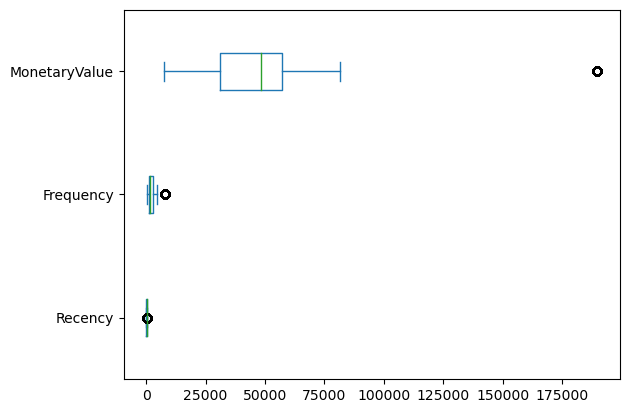

In [157]:
loyals[['Recency',"Frequency","MonetaryValue"]].plot(kind="box",vert=False)

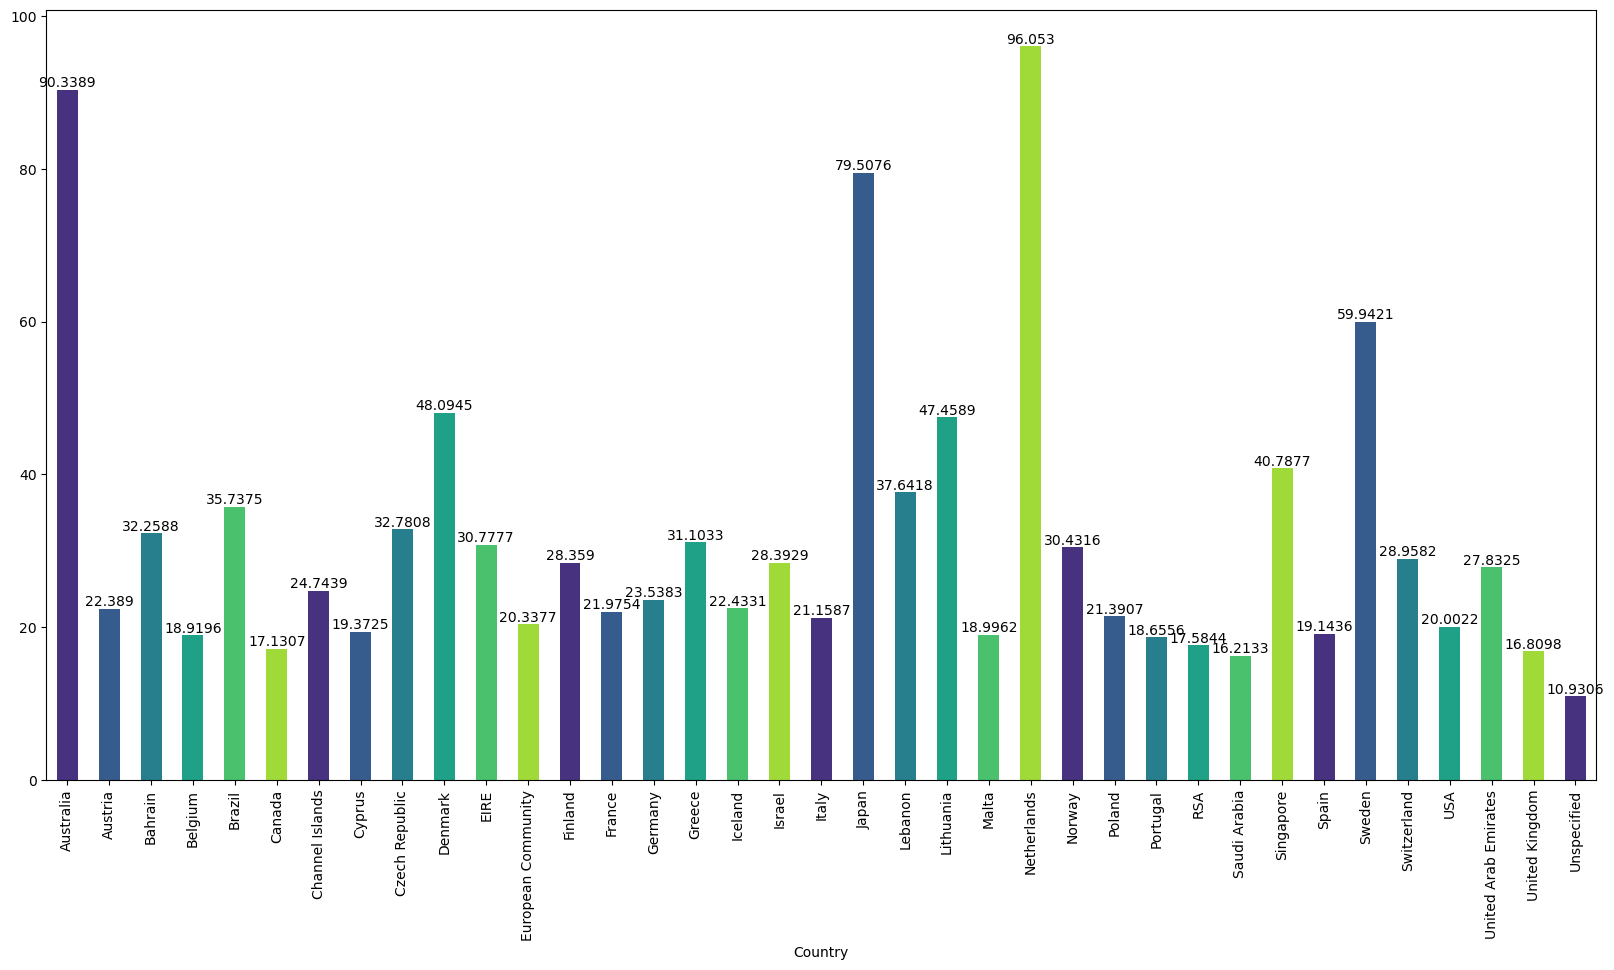

In [163]:
plt.figure(figsize=(20,10))
ax=rfmdf.TotalPrice.groupby(rfmdf.Country).mean().plot(kind='bar',color=sns.color_palette('viridis'))
for i in ax.containers:
    ax.bar_label(i)

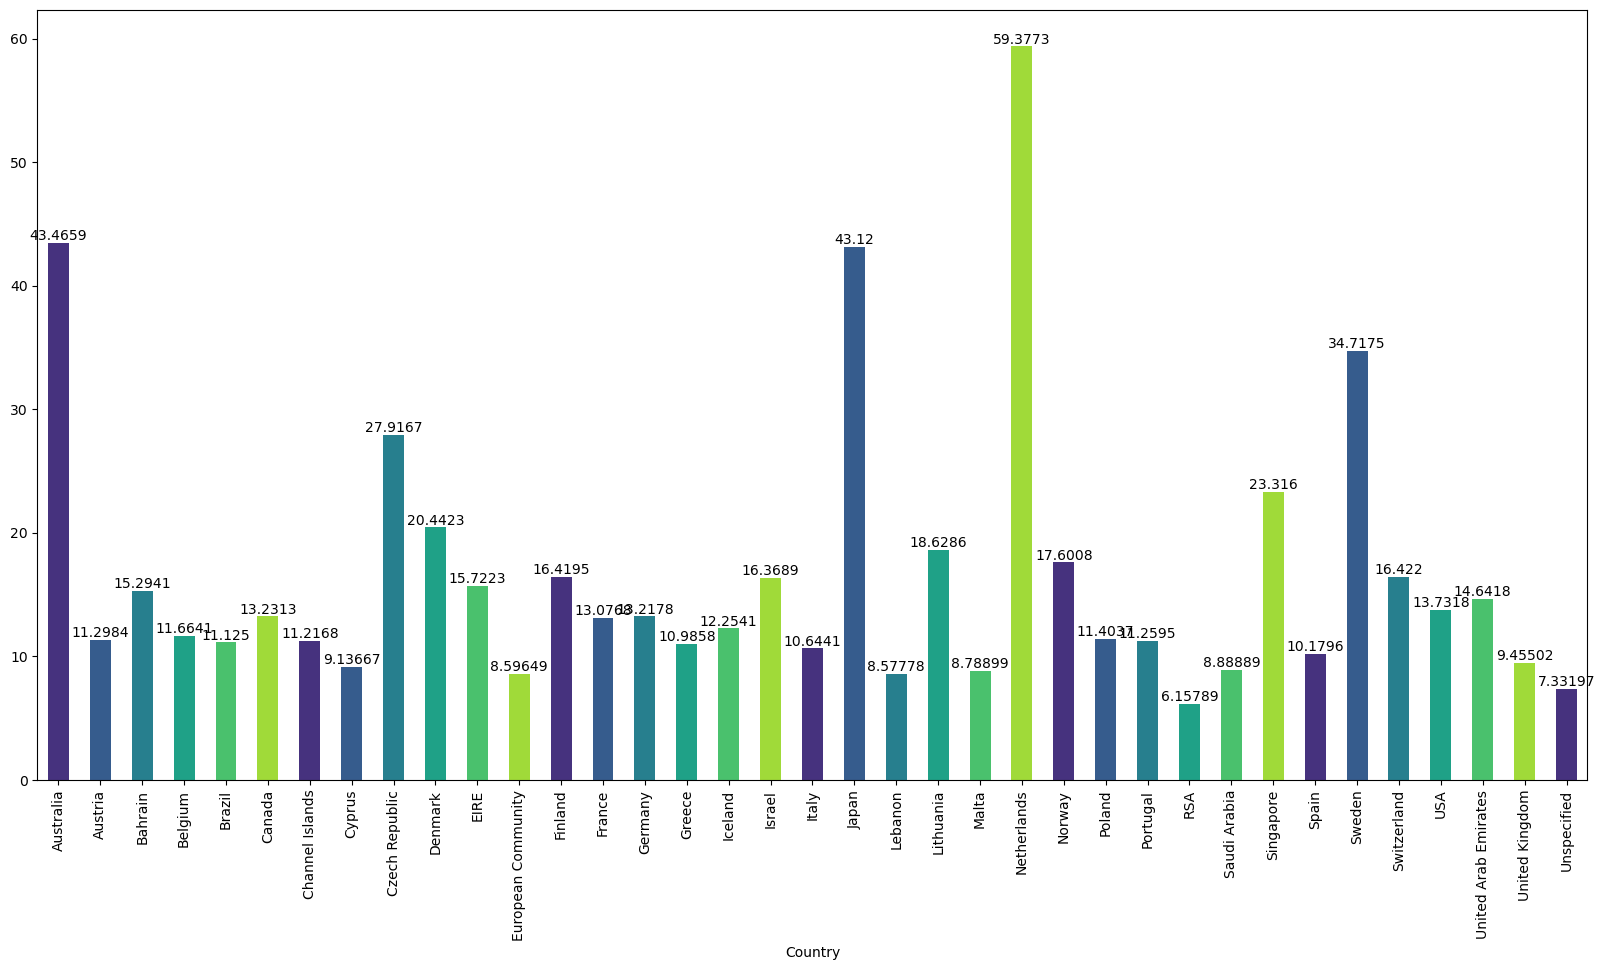

In [164]:
plt.figure(figsize=(20,10))
ax=rfmdf.Quantity.groupby(rfmdf.Country).mean().plot(kind='bar',color=sns.color_palette('viridis'))
for i in ax.containers:
    ax.bar_label(i)

In [158]:
# Top 20 Loyalists 
pd.crosstab(rfmdf['CustomerID'],rfmdf.RFM_Segment).nlargest(20,columns="Loyal customers")

RFM_Segment,At risk,Champions,Loyal customers,Potential loyalist,Recent customers
CustomerID,,,,,
17841.0,0,7239,579,0,0
14606.0,574,0,577,1541,0
15311.0,0,517,475,1369,0
14156.0,0,178,471,647,0
13263.0,39,0,452,1181,0
14298.0,0,268,433,903,0
12748.0,0,2381,429,1747,0
13089.0,0,351,366,1091,0
14088.0,90,0,291,199,0


In [159]:
# Top 20 Champions
pd.crosstab(rfmdf['CustomerID'],rfmdf.RFM_Segment).nlargest(20,columns="Champions")

RFM_Segment,At risk,Champions,Loyal customers,Potential loyalist,Recent customers
CustomerID,,,,,
17841.0,0,7239,579,0,0
14911.0,0,5542,0,0,0
14096.0,0,5062,0,0,0
12748.0,0,2381,429,1747,0
14646.0,0,1505,259,0,0
15311.0,0,517,475,1369,0
13089.0,0,351,366,1091,0
14298.0,0,268,433,903,0
17511.0,0,225,211,466,0


In [160]:
# No of Top 20 loyalists from each location
pd.crosstab(rfmdf.Country,rfmdf.RFM_Segment).nlargest(20,columns="Loyal customers")

RFM_Segment,At risk,Champions,Loyal customers,Potential loyalist,Recent customers
Country,,,,,
United Kingdom,52395,16195,4057,233685,44864
EIRE,45,5720,471,724,37
Netherlands,52,1505,259,189,20
Australia,53,98,140,628,122
Austria,38,0,0,318,26
Bahrain,0,0,0,17,0
Belgium,349,0,0,1413,167
Brazil,32,0,0,0,0
Canada,10,0,0,137,0


### Conclude your findings of RFM analysis and suggest some strategies on it.

Recency, frequency, monetary value (RFM) is a model used in marketing analysis that segments a company’s consumer base by their purchasing patterns or habits. In particular, it evaluates customers’ recency (how long ago they made a purchase), frequency (how often they make purchases), and monetary value (how much money they spend). RFM is then used to identify a company’s or an organization’s best customers by measuring and analyzing spending habits to improve low-scoring customers and maintain high-scoring ones. An RFM analysis evaluates clients and customers by scoring them in three categories: how recently they’ve made a purchase, how often they buy, and the size of their purchases. The RFM model assigns a score of 1 to 5 (from worst to best) for customers in each of the three categories. RFM analysis helps firms reasonably predict which customers are likely to purchase their products again, how much revenue comes from new (vs. repeat) clients, and how to turn occasional buyers into habitual ones.

## strategies

##### Loyalty Programs:

Implement loyalty programs targeted at high-value segments like Champions and Loyal Customers.
Offer exclusive rewards, discounts, or early access to products to encourage repeat business.

##### Reactivation Campaigns:

Identify at-risk or hibernating segments and launch targeted reactivation campaigns.
Provide compelling incentives to bring back customers who have shown signs of reduced engagement 
or inactivity.

##### Personalized Communication:

Customize communication channels and content based on the preferences and behaviors 
of different segments. Personalized emails, messages, or notifications can enhance customer
engagement.

##### Dynamic Pricing:

Adjust pricing strategies for different segments.
For example, offer special discounts to Recent Customers or Promising segments to 
encourage more frequent and higher-value purchases.

##### Customer Feedback and Surveys:

Gather feedback from different segments to understand their preferences,
expectations, and pain points. Use surveys to gain insights and tailor products or
services accordingly.